In [73]:
from igraph import *

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import math
import requests
import pickle
import json
import copy
import os
import re

from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [48]:
sdg_data = pd.read_excel('SDR-2022-database.xlsx')
sdg_data.head()

,Country Code ISO3,Country,Year,Population,Region,Income Group,SDG Index Score,Goal 1 Score,Goal 2 Score,Goal 3 Score,...,n_sdg16_cpi,n_sdg16_clabor,n_sdg16_weaponsexp,n_sdg16_rsf,n_sdg16_justice,n_sdg17_govex,n_sdg17_oda,n_sdg17_govrev,n_sdg17_cohaven,n_sdg17_statperf
0,AFG,Afghanistan,2000,20779957.0,E_Euro_Asia,LIC,44.819087,91.417142,33.883143,20.329857,...,0.0,45.573,100.0,61.329,42.308,26.327,NaN,0.0,100.0,16.297
1,AFG,Afghanistan,2001,21606992.0,E_Euro_Asia,LIC,45.109257,91.417142,36.932429,20.445929,...,0.0,45.573,100.0,61.329,42.308,26.327,NaN,0.0,100.0,16.297
2,AFG,Afghanistan,2002,22600774.0,E_Euro_Asia,LIC,45.032270,91.417142,35.922000,20.720143,...,0.0,45.573,100.0,61.329,42.308,26.327,NaN,0.0,100.0,16.297
3,AFG,Afghanistan,2003,23680871.0,E_Euro_Asia,LIC,45.275423,91.417142,37.142571,20.932000,...,0.0,45.573,100.0,61.329,42.308,26.327,NaN,0.0,100.0,16.297
4,AFG,Afghanistan,2004,24726689.0,E_Euro_Asia,LIC,45.530799,91.417142,37.827429,21.980500,...,0.0,45.573,100.0,61.329,42.308,26.327,NaN,0.0,100.0,16.297


In [59]:
sdg_pearson = sdg_data.corr(method='pearson')
sdg_pearson.head()

,Year,Population,SDG Index Score,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,...,n_sdg16_cpi,n_sdg16_clabor,n_sdg16_weaponsexp,n_sdg16_rsf,n_sdg16_justice,n_sdg17_govex,n_sdg17_oda,n_sdg17_govrev,n_sdg17_cohaven,n_sdg17_statperf
Year,1.000000,0.021671,0.199563,0.059040,0.091670,0.179954,0.138721,0.244455,0.099118,0.136654,...,0.006286,-0.001231,0.000446,-0.046447,0.081054,0.099815,0.073634,0.041563,-1.236790e-14,0.085557
Population,0.021671,1.000000,-0.012391,-0.036337,0.110715,-0.000999,0.082021,-0.014101,-0.019459,-0.005369,...,-0.042305,0.029879,-0.036911,-0.218110,-0.128777,-0.113982,-0.110515,-0.181484,-1.552361e-03,0.060029
SDG Index Score,0.199563,-0.012391,1.000000,0.857600,0.714460,0.931244,0.869232,0.715487,0.876941,0.804556,...,0.698792,0.814679,-0.399413,0.394779,0.730401,0.696829,0.295046,0.470579,-3.678042e-01,0.779626
Goal 1 Score,0.059040,-0.036337,0.857600,1.000000,0.534598,0.882247,0.779794,0.446108,0.743996,0.745259,...,0.521815,0.818522,-0.315700,0.212801,0.603860,0.529737,0.064334,0.419737,-3.233912e-01,0.557915
Goal 2 Score,0.091670,0.110715,0.714460,0.534598,1.000000,0.652034,0.622793,0.542536,0.645288,0.524726,...,0.576599,0.530872,-0.319284,0.299404,0.549200,0.434879,-0.132915,0.170814,-3.415162e-01,0.666445


In [74]:
sdg_goals = {}
sdg_temp = []
for item in sdg_pearson:
    if item.startswith('Goal '):
        sdg_goals[item] = []
        sdg_temp.append(item)
    if item.startswith('n_sdg'):
        n_sdg = item[5:7]
        goal_number = re.sub('[^0-9]', '', n_sdg)
        sdg_goals[f'Goal {goal_number} Score'].append(item)

for item in sdg_goals:
    print(item)
    for sub_item in sdg_goals[item]:
        print(sub_item)

Goal 1 Score
n_sdg1_wpc
n_sdg1_320pov
Goal 2 Score
n_sdg2_undernsh
n_sdg2_stunting
n_sdg2_wasting
n_sdg2_obesity
n_sdg2_trophic
n_sdg2_crlyld
n_sdg2_snmi
n_sdg2_pestexp
Goal 3 Score
n_sdg3_matmort
n_sdg3_neonat
n_sdg3_u5mort
n_sdg3_tb
n_sdg3_hiv
n_sdg3_ncds
n_sdg3_pollmort
n_sdg3_traffic
n_sdg3_lifee
n_sdg3_fertility
n_sdg3_births
n_sdg3_vac
n_sdg3_uhc
n_sdg3_swb
Goal 4 Score
n_sdg4_earlyedu
n_sdg4_primary
n_sdg4_second
n_sdg4_literacy
Goal 5 Score
n_sdg5_familypl
n_sdg5_edat
n_sdg5_lfpr
n_sdg5_parl
Goal 6 Score
n_sdg6_water
n_sdg6_sanita
n_sdg6_freshwat
n_sdg6_wastewat
n_sdg6_scarcew
Goal 7 Score
n_sdg7_elecac
n_sdg7_cleanfuel
n_sdg7_co2twh
n_sdg7_ren
Goal 8 Score
n_sdg8_adjgrowth
n_sdg8_slavery
n_sdg8_accounts
n_sdg8_unemp
n_sdg8_rights
n_sdg8_impacc
Goal 9 Score
n_sdg9_intuse
n_sdg9_mobuse
n_sdg9_lpi
n_sdg9_uni
n_sdg9_articles
n_sdg9_rdex
Goal 10 Score
n_sdg10_gini
n_sdg10_palma
Goal 11 Score
n_sdg11_slums
n_sdg11_pm25
n_sdg11_pipedwat
n_sdg11_transport
Goal 12 Score
n_sdg12_msw
n_s

In [ ]:
edges = sdg_pearson.stack().reset_index()
edges.columns = 

In [167]:
political_blogs = Graph.Read(
    f="polblogs.gml", format="gml"
    )
political_blogs_data = f'{political_blogs.summary()[7:].replace("-","").strip()[:-51]} {len(political_blogs.clusters(mode="strong"))} {len(political_blogs.clusters(mode="weak"))} {political_blogs.maxdegree()} {political_blogs.average_path_length()} {political_blogs.diameter()} {political_blogs.transitivity_avglocal_undirected()} {political_blogs.transitivity_undirected()}'
political_blogs_data = political_blogs_data.split()
data_requests = ['type', 'n', 'm', 'c_strong', 'c_weak', 'd', 'l', 'L', 'cc_l', 'cc_g']
counter = 0
for data in political_blogs_data:
    print(f'{data_requests[counter]}: {data}')
    counter += 1

type: D
n: 1490
m: 19090
c_strong: 688
c_weak: 268
d: 468
l: 3.3901837252152363
L: 9
cc_l: 0.3600286522101197
cc_g: 0.2259585173589758


N = 1490, mean +- sd: 25.6242 +- 42.9418
Each * represents 4 items
[  0,   1): ****************************************************************** (266)
[  1,   2): ******************************** (129)
[  2,   3): *********************** (95)
[  3,   4): ******************** (80)
[  4,   5): ************* (53)
[  5,   6): ********** (40)
[  6,   7): ********** (41)
[  7,   8): ******** (34)
[  8,   9): ******* (29)
[  9,  10): **** (16)
[ 10,  11): ***** (21)
[ 11,  12): ***** (21)
[ 12,  13): *** (14)
[ 13,  14): ***** (22)
[ 14,  15): ****** (25)
[ 15,  16): ******* (28)
[ 16,  17): **** (16)
[ 17,  18): ***** (23)
[ 18,  19): ***** (20)
[ 19,  20): **** (16)
[ 20,  21): *** (13)
[ 21,  22): **** (16)
[ 22,  23): **** (16)
[ 23,  24): ** (11)
[ 24,  25): ** (8)
[ 25,  26): * (7)
[ 26,  27): ** (8)
[ 27,  28): *** (12)
[ 28,  29): ** (8)
[ 29,  30): * (5)
[ 30,  31): ** (10)
[ 31,  32): * (6)
[ 32,  33): * (7)
[ 33,  34): *** (12)
[ 34,  35): ** (10)
[ 35,  36): * (7)
[ 36,  37): ** 

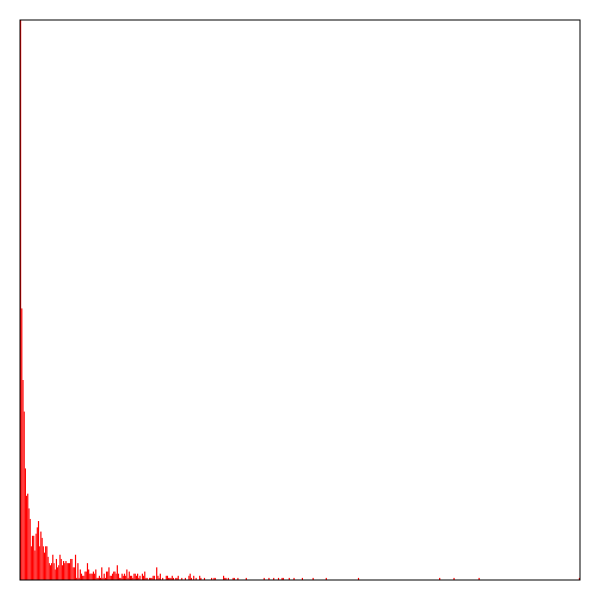

In [192]:
print(political_blogs.degree_distribution())
plot(political_blogs.degree_distribution())

N = 981248, mean +- sd: 3.3902 +- 1.1302
Each * represents 5901 items
[ 1,  2): *** (19022)
[ 2,  3): ******************************** (193830)
[ 3,  4): *********************************************************** (348198)
[ 4,  5): ********************************************** (275702)
[ 5,  6): ****************** (107394)
[ 6,  7): **** (25602)
[ 7,  8): * (10092)
[ 8,  9):  (1371)
[ 9, 10):  (37)


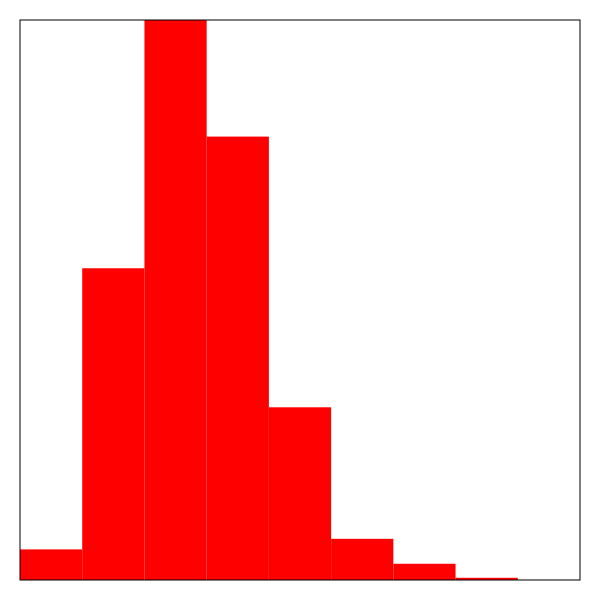

In [169]:
print(political_blogs.path_length_hist())
plot(political_blogs.path_length_hist())